In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Dict, List, Tuple
%matplotlib inline

def plot_benchmarks(
    title: str,
    latencies_with_label: Dict[str, List],
    baseline: np.ndarray,
    sequence_lengths: List[int] = [16, 32, 64, 128],
    figuresize: Tuple[int] = (10, 5),
) -> None:
    """
    Plot the speedups of optimizations over the baseline.
    """
    sns.set_style("whitegrid")  # darkgrid, whitegrid, dark, white and ticks
    plt.rc("axes", titlesize=15)  # fontsize of the axes title
    plt.rc("axes", labelsize=14)  # fontsize of the x and y labels
    plt.rc("xtick", labelsize=13)  # fontsize of the tick labels
    plt.rc("ytick", labelsize=13)  # fontsize of the tick labels
    plt.rc("legend", fontsize=15)  # legend fontsize
    plt.rc("font", size=13)  # controls default text sizes
    plt.figure(figsize=figuresize)

    colors = sns.color_palette("Paired", 20)

    plt.suptitle(f"{title}")
    plt.xticks(sequence_lengths)
    plt.title("effect of arithmetic intensity on speedup")
    plt.ylabel("Speedup Over Baseline")
    plt.xlabel("Sequence Length")

    labels: List[str] = list(latencies_with_label.keys())
    latencies: np.ndarray = np.array(list(latencies_with_label.values()))

    comparisons = baseline / latencies

    for i in range(len(labels)):
        plt.plot(sequence_lengths, comparisons[i], label=labels[i], color=colors[i])

    plt.legend(title="method")

    plt.show()


def plot_results(
    title: str,
    latencies_with_label: Dict[str, List],
    baseline: np.ndarray,
    sequence_lengths: List[int] = [16, 32, 64, 128],
    figuresize: Tuple[int] = (10, 5),
) -> None:
    """
    Plot the raw latencies of both baseline and optimizations.
    """
    sns.set_style("whitegrid")  # darkgrid, whitegrid, dark, white and ticks
    plt.rc("axes", titlesize=15)  # fontsize of the axes title
    plt.rc("axes", labelsize=14)  # fontsize of the x and y labels
    plt.rc("xtick", labelsize=13)  # fontsize of the tick labels
    plt.rc("ytick", labelsize=13)  # fontsize of the tick labels
    plt.rc("legend", fontsize=15)  # legend fontsize
    plt.rc("font", size=13)  # controls default text sizes
    plt.figure(figsize=figuresize)

    colors = sns.color_palette("Paired", 20)

    plt.suptitle(f"{title}")
    plt.xticks(sequence_lengths)
    plt.title("effect of arithmetic intensity on speedup")
    plt.ylabel("Latency (sec)")
    plt.xlabel("Sequence Length")

    labels: List[str] = list(latencies_with_label.keys())
    latencies: np.ndarray = np.array(list(latencies_with_label.values()))

    plt.plot(sequence_lengths, baseline, label="PyTorch / fp32", color=colors[-1])
    for i in range(len(labels)):
        plt.plot(sequence_lengths, latencies[i], label=labels[i], color=colors[i])

    plt.legend(title="method")

    plt.show()


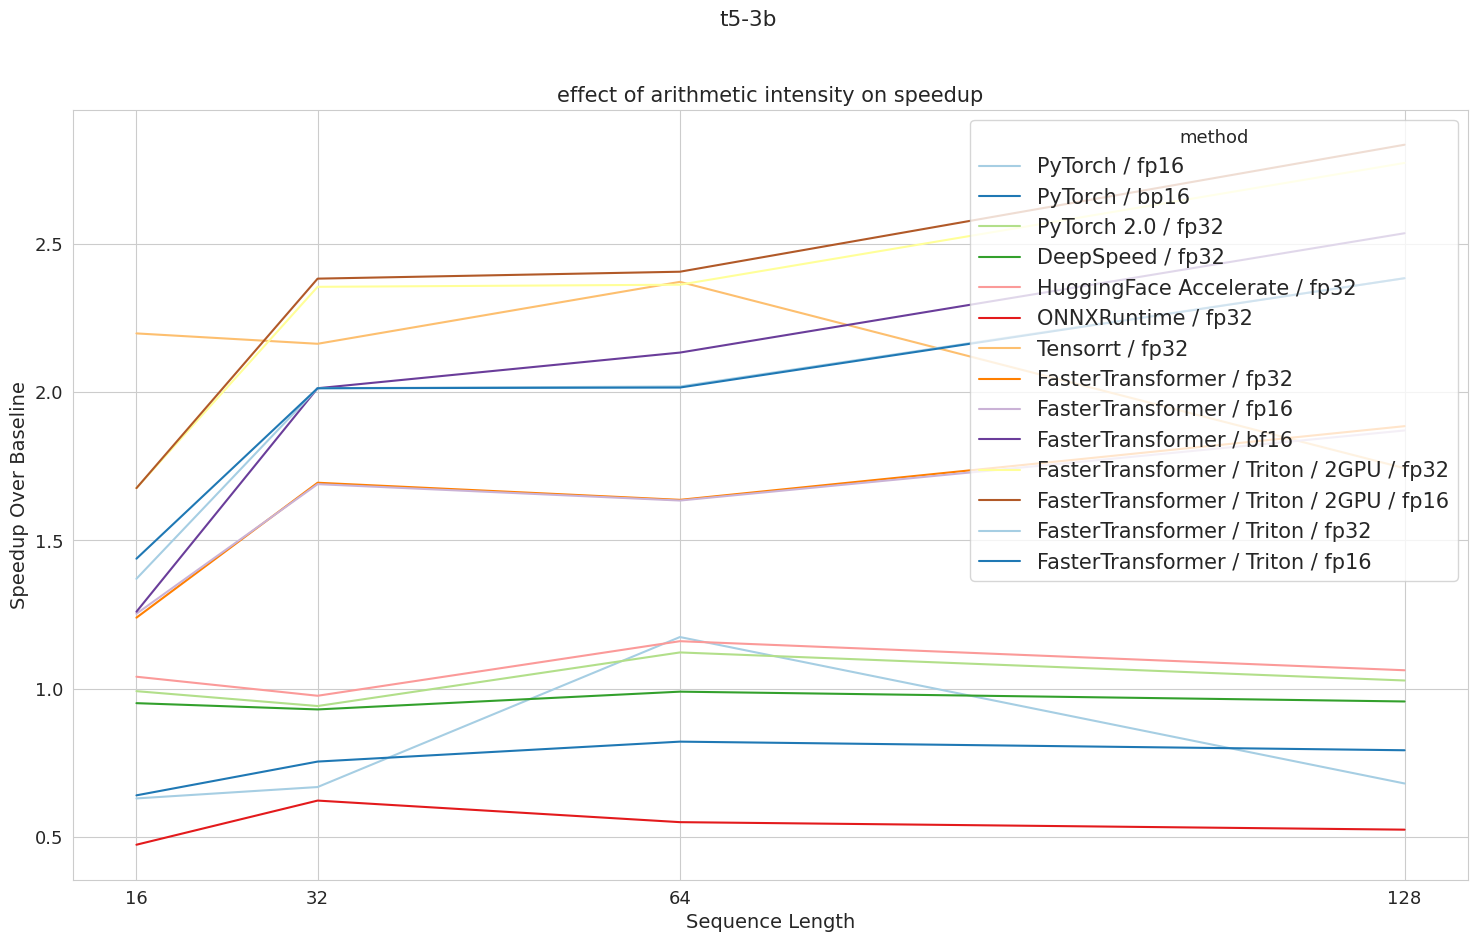

In [3]:
# DONE
# t5-3b
baseline = np.array([0.233, 0.610, 1.167, 2.432])  # PyTorch fp32
raw_latencies = {
    "PyTorch / fp16": [0.37, 0.913, 0.994, 3.576],
    "PyTorch / bp16": [0.364, 0.809, 1.421, 3.07],
    "PyTorch 2.0 / fp32": [0.235, 0.648, 1.04, 2.367],
    "DeepSpeed / fp32": [0.245, 0.656, 1.179, 2.542],
    "HuggingFace Accelerate / fp32": [0.224, 0.625, 1.006, 2.29],
    "ONNXRuntime / fp32": [0.492, 0.98, 2.123, 4.638],
    "Tensorrt / fp32": [0.106, 0.282, 0.492, 1.395],
    # FasterTransformer
    "FasterTransformer / fp32": [0.188, 0.36, 0.713, 1.29],
    "FasterTransformer / fp16": [0.186, 0.361, 0.714, 1.3],
    "FasterTransformer / bf16": [0.185, 0.303, 0.547, 0.959],
    # FasterTransformer + triton
    "FasterTransformer / Triton / 2GPU / fp32": [0.139, 0.259, 0.494, 0.877],
    "FasterTransformer / Triton / 2GPU / fp16": [0.139, 0.256, 0.485, 0.858],
    "FasterTransformer / Triton / fp32": [0.170, 0.303, 0.578, 1.020],
    "FasterTransformer / Triton / fp16": [0.162, 0.303, 0.579, 1.020],
}

# plot_results("t5-3b", latencies_with_label=raw_latencies, baseline=baseline)
plot_benchmarks(
    "t5-3b",
    latencies_with_label=raw_latencies,
    baseline=baseline,
    sequence_lengths=[16, 32, 64, 128],
    figuresize=(18, 10),
)


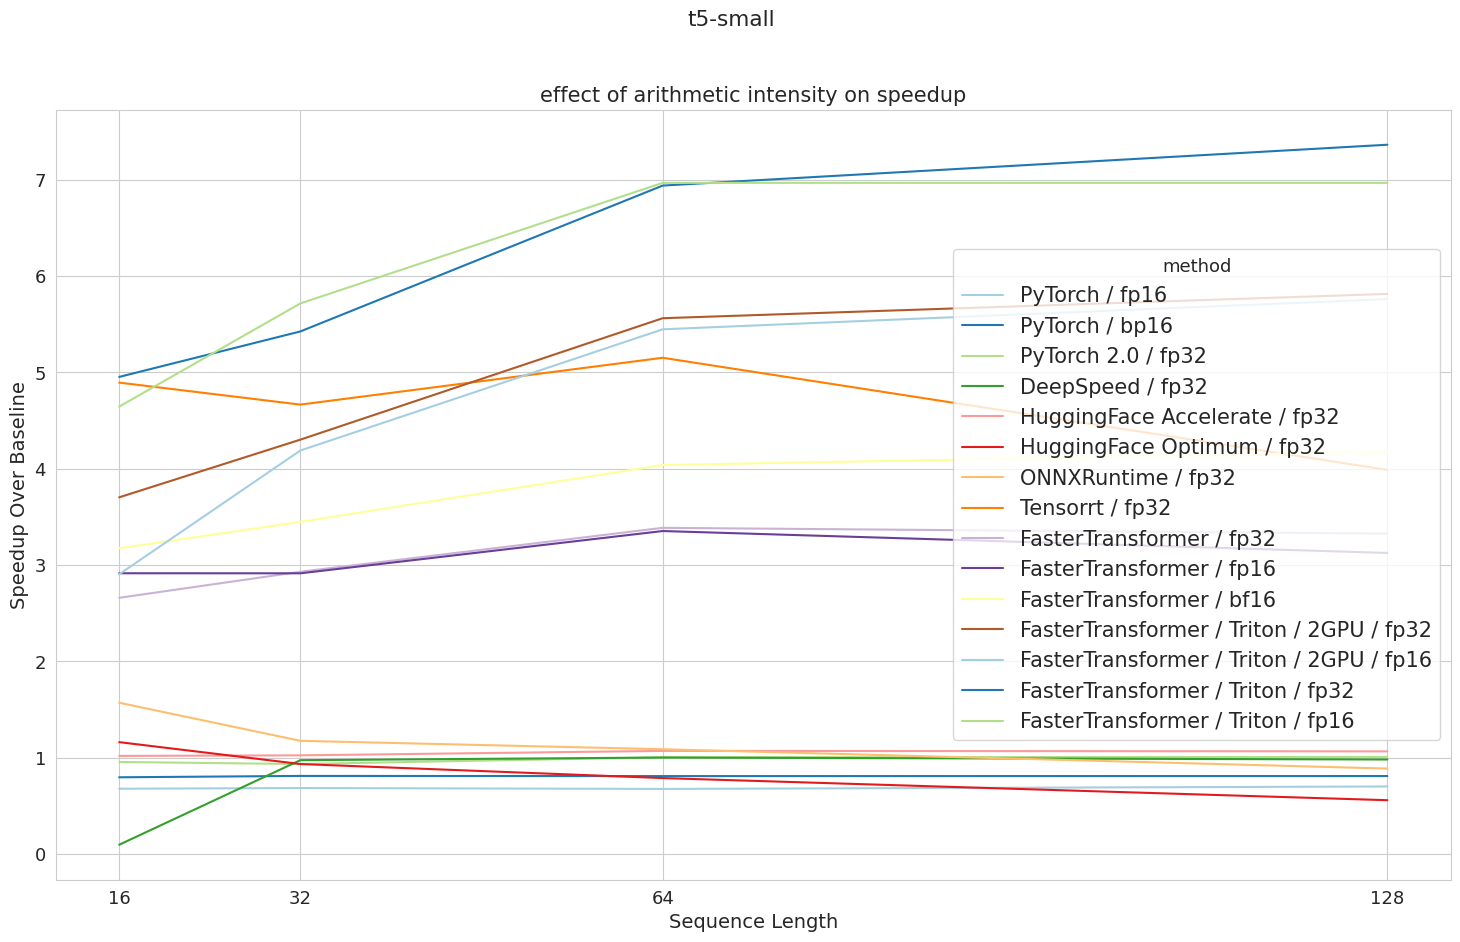

In [4]:
# DONE
# t5-small
baseline = np.array([0.0822, 0.160, 0.342, 0.622])  # PyTorch fp32
raw_latencies = {
    "PyTorch / fp16": [0.121, 0.233, 0.505, 0.885],
    "PyTorch / bp16": [0.103, 0.197, 0.422, 0.767],
    "PyTorch 2.0 / fp32": [0.0859, 0.171, 0.34, 0.616],
    "DeepSpeed / fp32": [0.835, 0.164, 0.341, 0.633],
    "HuggingFace Accelerate / fp32": [0.0806, 0.156, 0.319, 0.583],
    "HuggingFace Optimum / fp32": [0.0707, 0.171, 0.433, 1.11],
    "ONNXRuntime / fp32": [0.0523, 0.136, 0.314, 0.7],
    "Tensorrt / fp32": [0.0168, 0.0343, 0.0664, 0.156],
    # FasterTransformer
    "FasterTransformer / fp32": [0.0309, 0.0546, 0.101, 0.187],
    "FasterTransformer / fp16": [0.0282, 0.0549, 0.102, 0.199],
    "FasterTransformer / bf16": [0.0259, 0.0464, 0.0847, 0.149],
    # FasterTransformer + triton
    "FasterTransformer / Triton / 2GPU / fp32": [0.0222, 0.0372, 0.0615, 0.107],
    "FasterTransformer / Triton / 2GPU / fp16": [0.0283, 0.0382, 0.0628, 0.108],
    "FasterTransformer / Triton / fp32": [0.0166, 0.0295, 0.0493, 0.0845],
    "FasterTransformer / Triton / fp16": [0.0177, 0.028, 0.0491, 0.0893],
}

# plot_results("t5-small", latencies_with_label=raw_latencies, baseline=baseline)
plot_benchmarks(
    "t5-small",
    latencies_with_label=raw_latencies,
    baseline=baseline,
    sequence_lengths=[16, 32, 64, 128],
    figuresize=(18, 10),
)


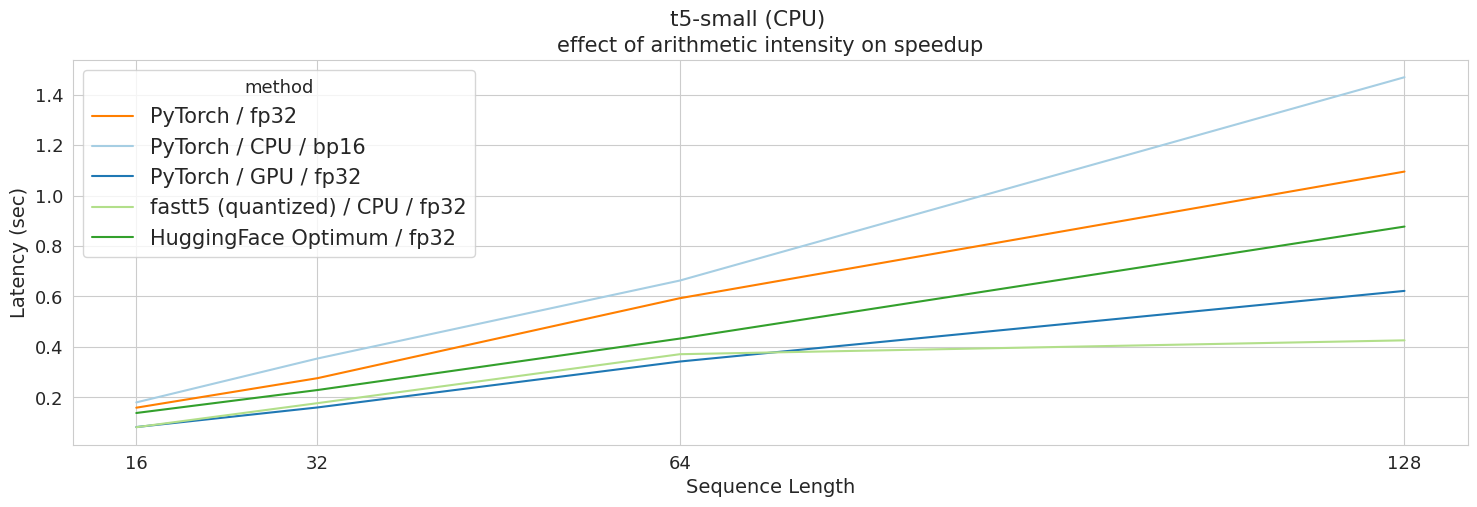

In [5]:
# DONE
# t5-small CPU
baseline = np.array([0.159, 0.276, 0.593, 1.095])  # PyTorch fp32
raw_latencies = {
    "PyTorch / CPU / bp16": [0.18	,0.354	,0.663	,1.469],
    "PyTorch / GPU / fp32": [0.0822, 0.160, 0.342, 0.622],
    "fastt5 (quantized) / CPU / fp32": [0.0816, 0.177, 0.371, 0.426],
    "HuggingFace Optimum / fp32": [0.138, 0.229, 0.433, 0.877],
}

# plot_results("t5-small", latencies_with_label=raw_latencies, baseline=baseline)
plot_results(
    "t5-small (CPU)",
    latencies_with_label=raw_latencies,
    baseline=baseline,
    sequence_lengths=[16, 32, 64, 128],
    figuresize=(18, 5),
)


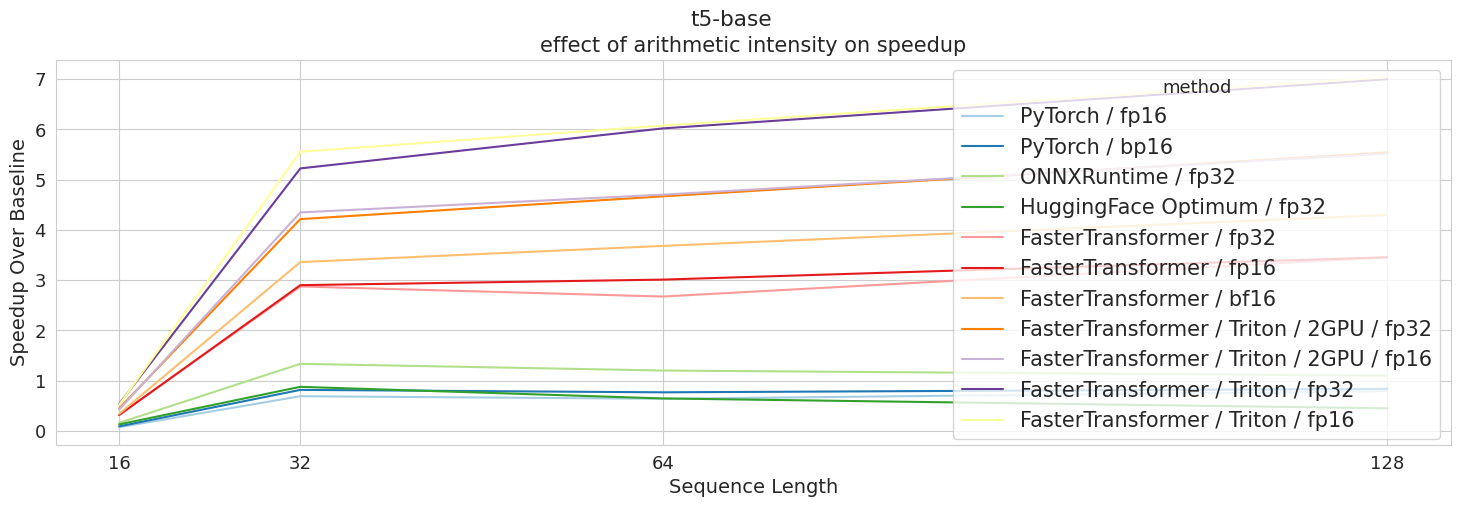

In [6]:
# DONE
# t5-base
# Only baseline (Pytorch) and FT / Triton
baseline = np.array([0.0179, 0.316, 0.644, 1.302])  # PyTorch fp32
raw_latencies = {
    "PyTorch / fp16": [0.252, 0.459, 1.011, 1.648],
    "PyTorch / bp16": [0.202, 0.388, 0.841, 1.56],
    "ONNXRuntime / fp32": [0.113, 0.237, 0.537, 1.186],
    "HuggingFace Optimum / fp32": [0.14, 0.361, 1, 2.91],
    # FasterTransformer
    "FasterTransformer / fp32": [0.0566, 0.11, 0.241, 0.377],
    "FasterTransformer / fp16": [0.0569, 0.109, 0.214, 0.377],
    "FasterTransformer / bf16": [0.0529, 0.0941, 0.175, 0.303],
    # FasterTransformer + Triton
    "FasterTransformer / Triton / 2GPU / fp32": [0.0402, 0.075, 0.138, 0.235],
    "FasterTransformer / Triton / 2GPU / fp16": [0.0423, 0.0727, 0.137, 0.236],
    "FasterTransformer / Triton / fp32": [0.0335, 0.0605, 0.107, 0.186],
    "FasterTransformer / Triton / fp16": [0.0346, 0.0569, 0.106, 0.185],
}

# plot_results("t5-small", latencies_with_label=raw_latencies, baseline=baseline)
plot_benchmarks(
    "t5-base",
    latencies_with_label=raw_latencies,
    baseline=baseline,
    sequence_lengths=[16, 32, 64, 128],
    figuresize=(18, 5),
)


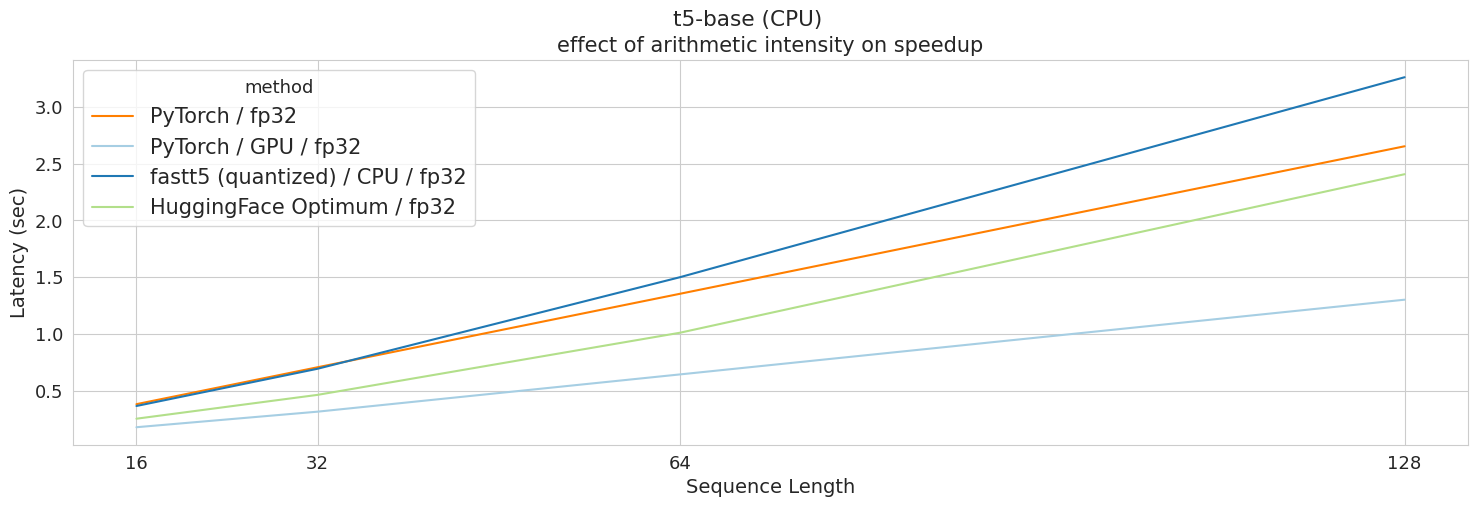

In [7]:
# DONE
# t5-base CPU
baseline = np.array([0.382, 0.707, 1.354, 2.653])  # PyTorch fp32
raw_latencies = {
    "PyTorch / GPU / fp32": [0.179, 0.316, 0.644, 1.302],
    "fastt5 (quantized) / CPU / fp32": [0.366, 0.694, 1.5, 3.261],
    "HuggingFace Optimum / fp32": [0.254, 0.464, 1.011, 2.407],
}

# plot_results("t5-small", latencies_with_label=raw_latencies, baseline=baseline)
plot_results(
    "t5-base (CPU)",
    latencies_with_label=raw_latencies,
    baseline=baseline,
    sequence_lengths=[16, 32, 64, 128],
    figuresize=(18, 5),
)


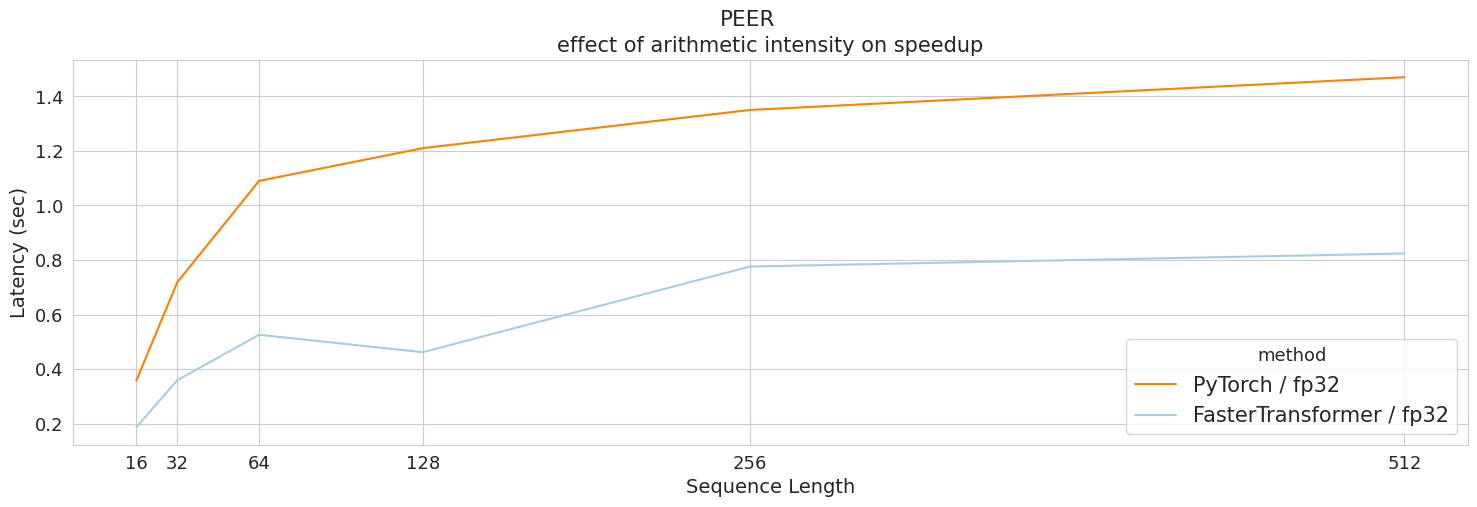

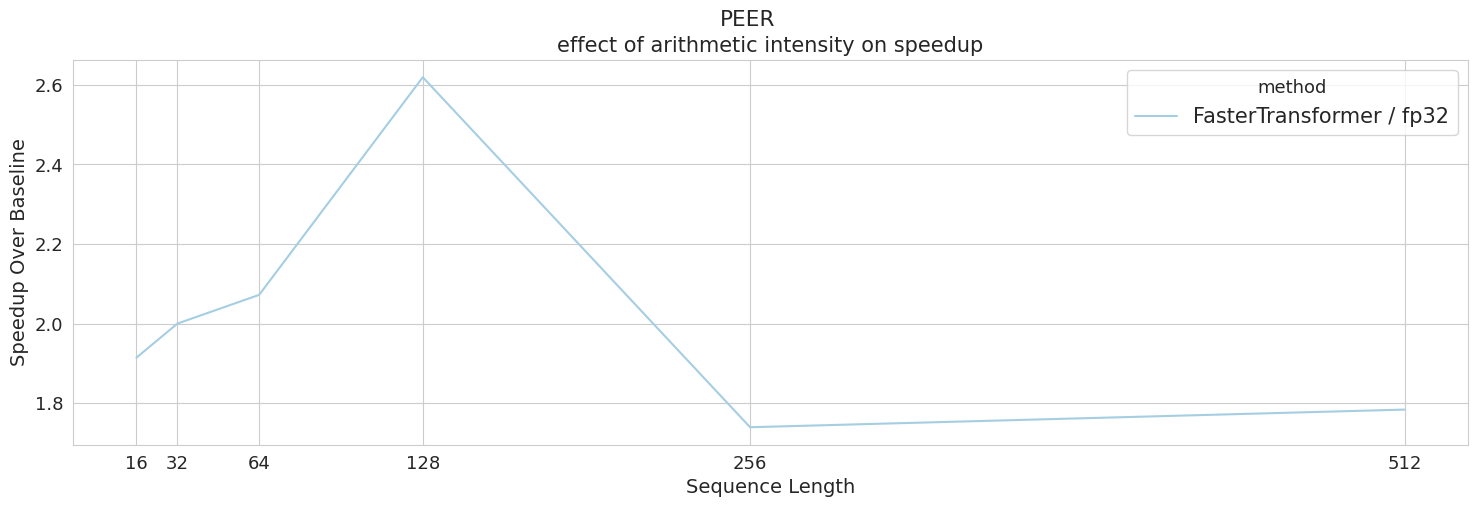

In [8]:
# DONE
# peer
# Only baseline (Pytorch) and FT / Triton
baseline = np.array([0.358, 0.718, 1.09, 1.21, 1.35, 1.47])  # PyTorch fp32
raw_latencies = {
    "FasterTransformer / fp32": [0.187, 0.359, 0.526, 0.462, 0.776, 0.824],
}

plot_results(
    "PEER",
    latencies_with_label=raw_latencies,
    baseline=baseline,
    sequence_lengths=[16, 32, 64, 128, 256, 512],
    figuresize=(18, 5),
)

plot_benchmarks(
    "PEER",
    latencies_with_label=raw_latencies,
    baseline=baseline,
    sequence_lengths=[16, 32, 64, 128, 256, 512],
    figuresize=(18, 5),
)
